# Exploratory Data Analysis (EDA)

El proceso que generalmente uno debe realizar es poder



1.   Verificacion de datos iniciales
2.   Datos nulos y datos duplicados
3.   Graficos univariados
4.   Graficos multivariados
5.   Outliers
6.   Decisiones a realizar



In [1]:
#Empecemos importando las librerias y el dataset a utilizar
import numpy as np
import pandas as pd


wine_quality = pd.read_csv("C:\\Users\\VICTUS\\Documents\\2024\\MACHINE LEARNING FOR DATA SCIENCE\\Datos\\CSV\\winequality-red.csv", sep = ",")

In [6]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   --------------- ------------------------ 112.6/294.9 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

## Verificacion de datos inicialmente



In [3]:
#Veamos las primeras 5 filas
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Veamos las 5 ultimas filas
wine_quality.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
#Dimension del dataset
print(wine_quality.shape)

(1599, 12)


¿Qué variables tenemos?
Lo primero que hay que hacer es tratar de identificar el tipo de variables que tenemos y cuáles son los features.

In [ ]:
#Nombre de los atributos
wine_quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Probablemente si no somos conocedores de vinos, estasa variables tengan poco sentido para nosotros. Recordemos que idealmente, deberíamos tener conocimiento del tema sobre el cual vamos a trabajar (obvio que también podemos conseguir un experto que nos guíe 😉).

Para mayor información sobre el significado de cada variable, podemos acceder a los siguientes links:
* https://wineserver.ucdavis.edu/industry-info/enology/methods-and-techniques/common-chemical-reagents/citric-acid
* https://waterhouse.ucdavis.edu/whats-in-wine
* https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/
* https://www.mt.com/gb/en/home/supportive_content/ana_chem_applications/titration/AP015.html

In [ ]:
#Tipo de dato para cada columna
wine_quality.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

**Completitud en los datos**:
Antes de comenzar cualquier análisis, es bueno revisar los datos para buscar información faltante; y en caso de que la haya, decidir qué es lo que podemos hacer con esos registros faltantes. Con los dataframes de pandas, podemos usar la función info() para encontrar los datos faltantes.

In [9]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#Otra manera también de obtener la misma información, hubiese sido calcular la totalidad de registros por columnas
wine_quality.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [10]:
#Antes de analizar lo principales estadísticos, verifiquemos si tenemos como estructura de dato un dataframe!
type(wine_quality)

pandas.core.frame.DataFrame

Insights



*   notiene nulos
*   casi todos las columnas son float y quality es int



# Estadísticas descriptivas

In [11]:
wine_quality.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
#Utilicemos la funcion round para visualizar mejor nuestros datos
wine_quality.describe().round().T #redondeo los decimales

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.0,2.0,5.0,7.0,8.0,9.0,16.0
volatile acidity,1599.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0
citric acid,1599.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
residual sugar,1599.0,3.0,1.0,1.0,2.0,2.0,3.0,16.0
chlorides,1599.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
free sulfur dioxide,1599.0,16.0,10.0,1.0,7.0,14.0,21.0,72.0
total sulfur dioxide,1599.0,46.0,33.0,6.0,22.0,38.0,62.0,289.0
density,1599.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
pH,1599.0,3.0,0.0,3.0,3.0,3.0,3.0,4.0
sulphates,1599.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0


C:\Users\VICTUS\AppData\Local\Temp\ipykernel_10316\2620479631.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  distplot(wine_quality.quality, hist=True)


<Axes: xlabel='quality', ylabel='Density'>

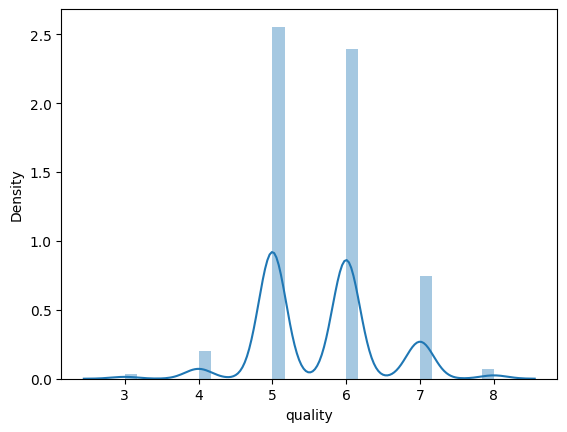

In [4]:
#Histograma
from seaborn import distplot
distplot(wine_quality.quality, hist=True)

<Axes: xlabel='quality', ylabel='count'>

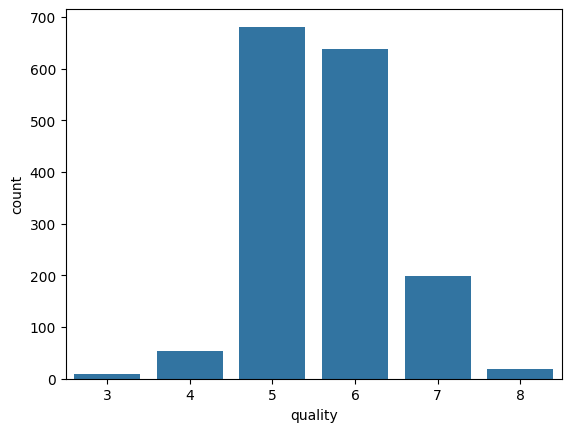

In [5]:
sns.countplot(x=wine_quality.quality)

Como podemos observar, nuestro conjunto de datos está desbalanceado, con muchos mas 5 y 6 que cualquier otro valor.

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_10316\3222596453.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  distplot(wine_quality["volatile acidity"])


<Axes: xlabel='volatile acidity', ylabel='Density'>

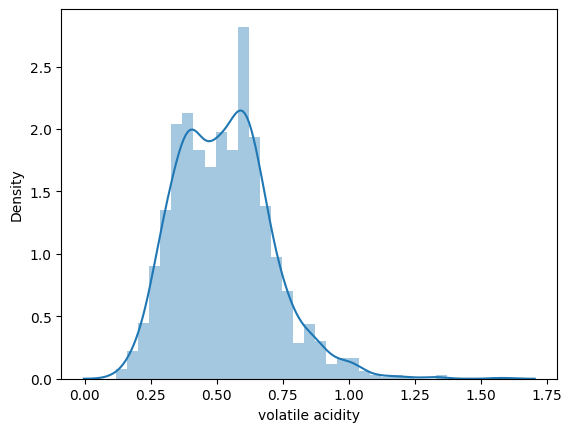

In [6]:
#Veamos otra variable!
distplot(wine_quality["volatile acidity"])

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_10316\3729726002.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine_quality[variable], ax=axes[i][j])
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_10316\3729726002.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wine_quality[variable], ax=

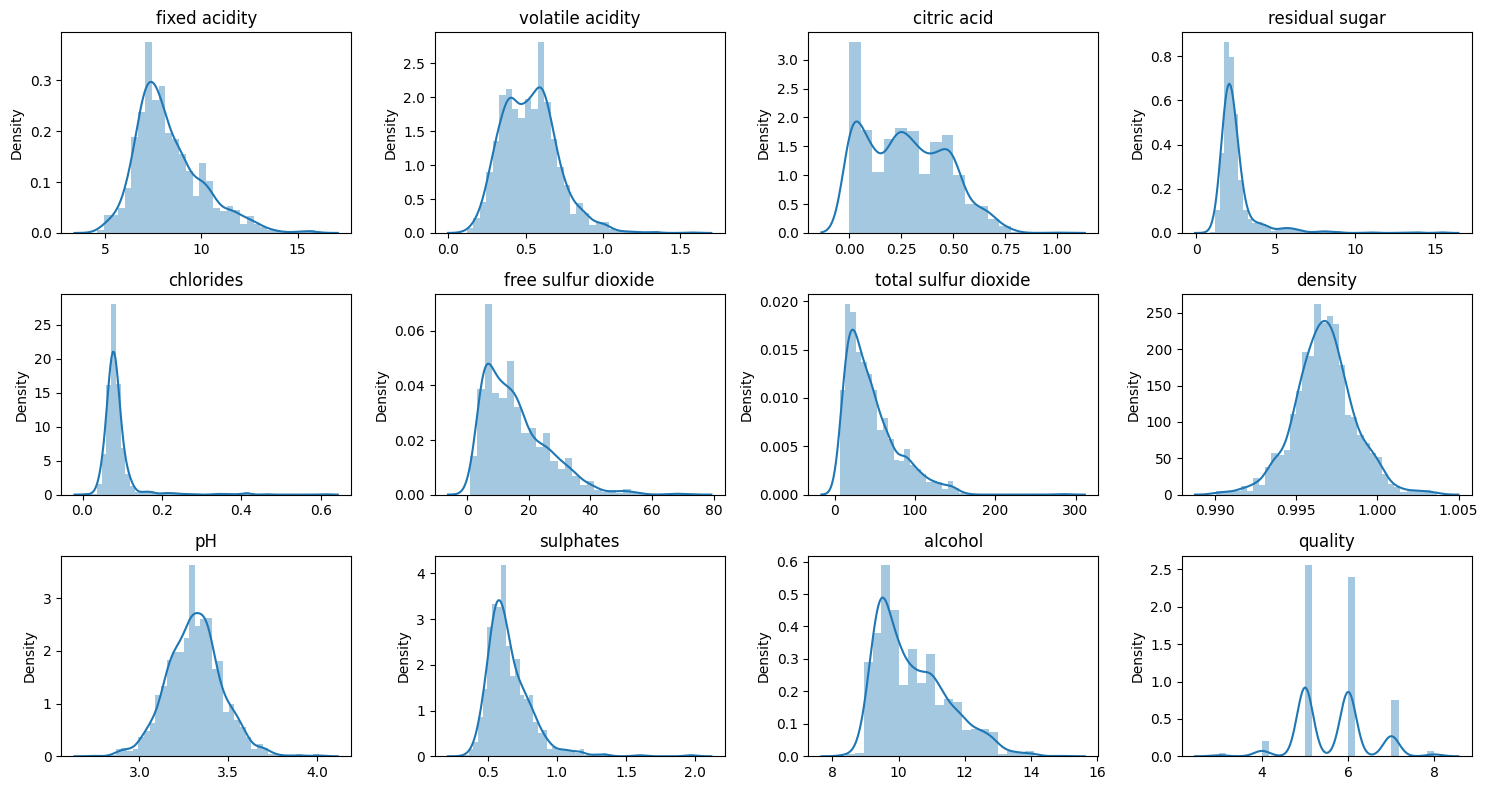

In [9]:
#Podemos usar un poco de código para visualizar más de una variable a la vez
variables = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol', 'quality']

columns = 4

fig, axes = plt.subplots(len(variables) //columns, columns, figsize=(15,8))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.distplot(wine_quality[variable], ax=axes[i][j])
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")

plt.tight_layout()

In [8]:
#len(variables) //columns

De esta gráfica podemos identificar varios aspectos, como ser por ejemplo que que muchas de las variables tienen una distribución asimétrica (fixed acidity, residual sugar, chlorides, por ejemplo), además de que al parecer algunos valores presetan valores extremos (residual sugar, sulphates, total sulfur dioxide).

# Boxplots
Como sabemos los boxplots nos permiten analizar y ver de una manera muy rápida qué variables tienen valores extremos.

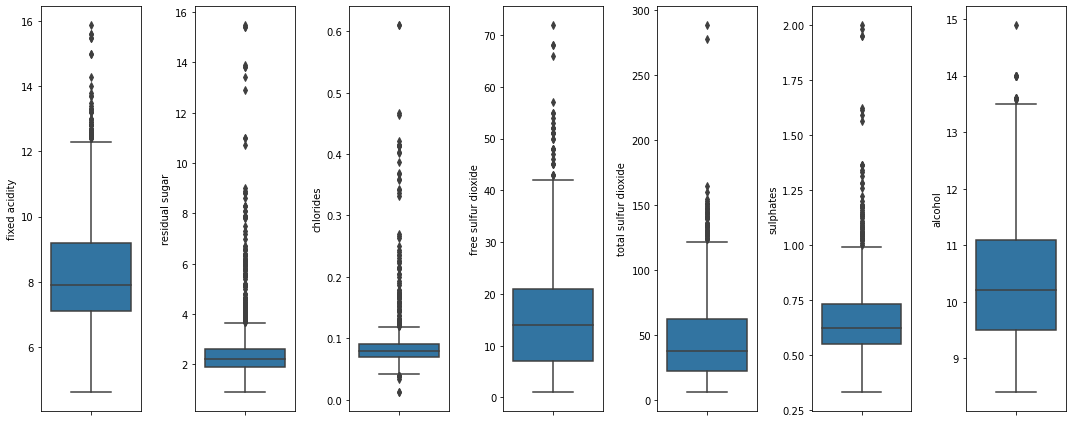

In [ ]:
variables = ['fixed acidity', 'residual sugar',
             'chlorides', 'free sulfur dioxide',
             'total sulfur dioxide','sulphates', 'alcohol']

fig, axes = plt.subplots(1, len(variables), figsize=(15,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=wine_quality, ax=ax)
plt.tight_layout()

# Scatterplots
Ahora tratemos de identificar de una manera rápida y visual la correlación entre variables!

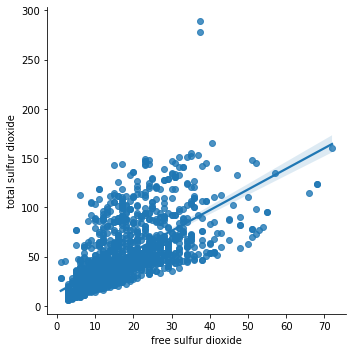

In [ ]:
from seaborn import lmplot
lmplot(x='free sulfur dioxide', y='total sulfur dioxide', data=wine_quality, fit_reg=True)

En la gráfica anterior, si se puede observar una clara relación entre las variables analizadas. También podemos
hacer uso de la Matriz de Correlación si quisieramos ver por ejemplo el coeficiente de **Pearson**

In [ ]:
correlation = wine_quality.corr(method="pearson")
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


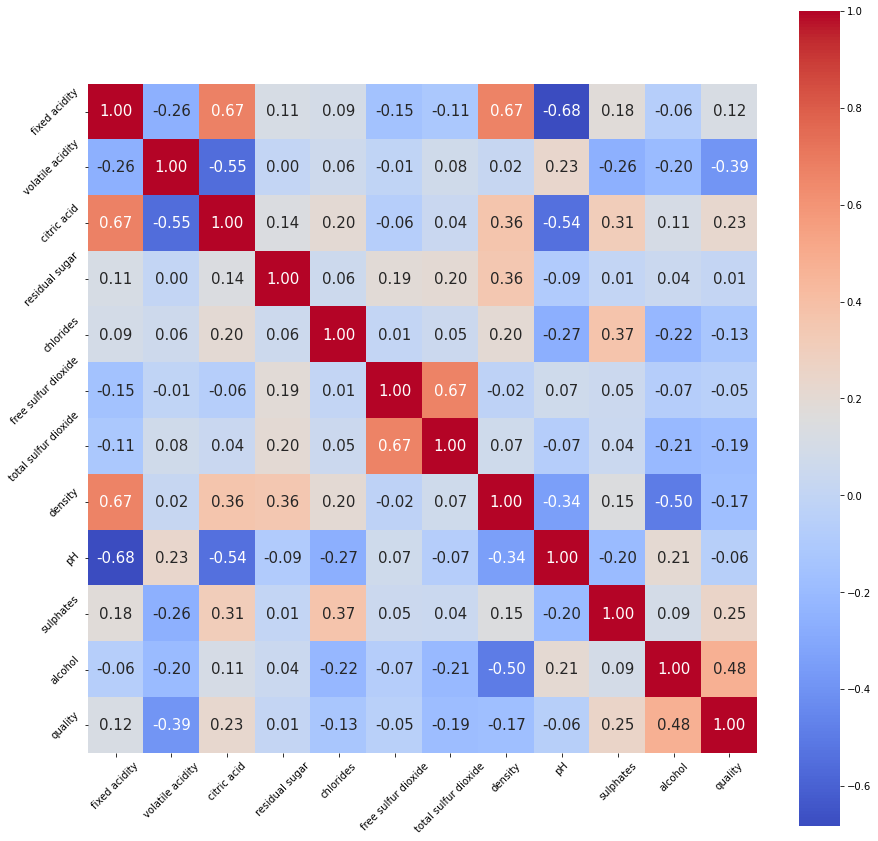

In [ ]:
#Resulta más intuitivo ver la matriz de correlación a través de un gráfico - heatmap de seaborn

plt.figure(figsize=(15,15)) #Defino el tamaño del grafico

#Genero el mapa de calor
sns.heatmap(correlation,
            cbar = True,
            square = True,
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 15},
            cmap= 'coolwarm')

#Roto los ejes para que queden inclinados
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

# Complemento 😉

Pandas profiling, es un módulo de Python de código abierto con el que podemos hacer rápidamente un análisis de datos exploratorio con solo unas pocas líneas de código. También nos genera informes interactivos en formato web.

Link de interés: https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html

In [ ]:
#from pandas_profiling import ProfileReport
#ProfileReport(wine_quality, minimal=True)

!pip install dataprep

DataPrep Report
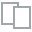
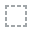
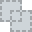
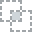
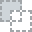
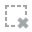
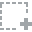
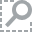
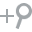
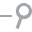
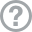
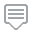
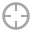
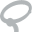
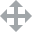
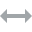
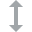
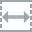
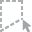
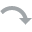
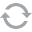
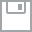
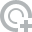
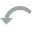
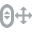
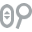
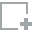
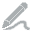
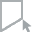
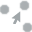
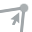
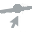

In [ ]:
from dataprep.eda import create_report
#Creating report
create_report(wine_quality)